In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

## Prepare Data

In [2]:
### Prepare data
## Train data
# input: weight (grams) and color score (1-10 scale)
# Data points (weight in grams, color score)
X_train = [
    [150, 7],  # Apple
    [170, 8],  # Apple
    [140, 6],  # Apple
    [300, 4],  # Orange
    [320, 5],  # Orange
    [310, 4],  # Orange
    [200, 4],  # Orange (additional point)
    [210, 5],  # Orange (additional point)
    [190, 4],  # Apple (additional point)
]

# target: 0 for Apple, 1 for Orange
y_train = [0, 0, 0, 1, 1, 1, 1, 1, 0]

## Test data
X_test = [
    [205, 4],  # Should be classified as Apple
    [315, 5]   # Should be classified as Orange
]
y_test = [0, 1]  # Actual labels for the test data

In [4]:
# Create a DataFrame for the training data
df_train = pd.DataFrame(X_train, columns=['Weight', 'Color Score'])
df_train['Class'] = y_train
df_train['Class'] = df_train['Class'].map({0: 'Apple', 1: 'Orange'})

df_test = pd.DataFrame(X_test, columns=['Weight', 'Color Score'])
df_test['Class'] = y_test
df_test['Class'] = df_test['Class'].map({0: 'Apple', 1: 'Orange'})

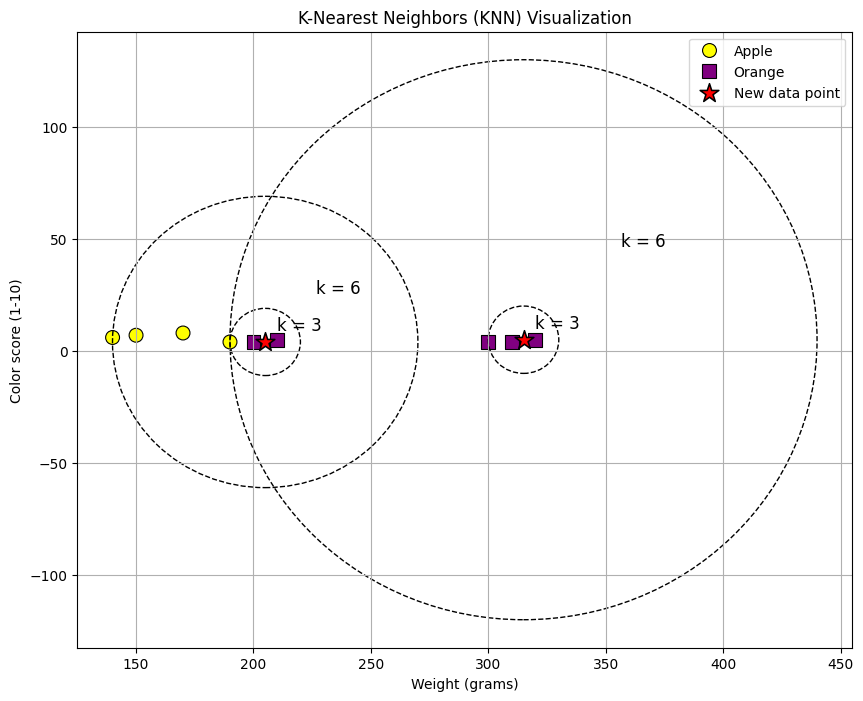

In [5]:
# Plotting
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df_train, x='Weight', y='Color Score', hue='Class', s=100, palette=['yellow', 'purple'], edgecolor='k', style='Class', markers=['o', 's'])

# Plot the new points
sns.scatterplot(data=df_test, x='Weight', y='Color Score', color='red', s=200, marker='*', edgecolor='k', label='New data point')

# Draw circles to indicate the nearest neighbors
for index, new_point in df_test.iterrows():
    # Convert to NumPy array
    new_point_values = new_point[['Weight', 'Color Score']].values.astype(float).reshape(1, -1)
    distances = np.linalg.norm(df_train[['Weight', 'Color Score']].values.astype(float) - new_point_values, axis=1)

    # Sort the distances and get the indices of the nearest neighbors
    nearest_indices = np.argsort(distances)

    for k in [3,6]:
        # Get the coordinates of the k-th nearest neighbor
        k_th_nearest = df_train.iloc[nearest_indices[k-1]][['Weight', 'Color Score']].values.astype(float)

        # Calculate the radius of the circle
        radius = np.linalg.norm(k_th_nearest - new_point_values)

        # Draw the circle
        circle = Circle(new_point[['Weight', 'Color Score']].values.astype(float), radius, color='black', fill=False, linestyle='--', linewidth=1)
        plt.gca().add_patch(circle)

        # Annotate k values
        plt.text(new_point['Weight'] + radius/3, new_point['Color Score'] + radius/3, f'k = {k}', fontsize=12)

# Set labels
plt.xlabel('Weight (grams)')
plt.ylabel('Color score (1-10)')
plt.legend()
plt.grid(True)
plt.title('K-Nearest Neighbors (KNN) Visualization')

plt.show()

In [9]:
### Train the model
## instantiate the estimator object
clf = KNeighborsClassifier(n_neighbors=6)

# fit the estimator on training data (X, y)
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [10]:
### Test
# predict the classes
# y_pred = clf.predict(X_test)

In [11]:
# ### Evaluate
# print(f'Predicted outputs: {y_pred}')
# print(f'Actual outputs: {y_test}')

# # calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Model accuracy:", accuracy)

Predicted outputs: [0 1]
Actual outputs: [0, 1]
Model accuracy: 1.0


In [12]:
clf.score(X_test, y_test)

1.0